notre projet intitulé "papy_sportif" a pour objectif de battre les algorithmes de BOOKMAKERS sur l’estimation de la probabilité d’une équipe ou u joueur gagnant le match.
au début on va essayer d'élaborer les premières itérations sur le jeu de données 


In [2]:
#celellue pour l'importation des modules
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# lire des deux dataframe
df_atp_data=pd.read_csv('atp_data.csv')
display(df_atp_data.head())
#display(df_atp_data.iloc[:,9:16])
#display(df_atp_data['ATP'])


,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,Wsets,Lsets,Comment,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
0,1,Adelaide,Australian Hardcourt Championships,2000-01-03,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
1,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Kiefer N.,...,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
2,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Gaudio G.,...,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
3,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,El Aynaoui Y.,...,2.0,1.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5
4,3,Doha,Qatar Open,2000-01-03,International,Outdoor,Hard,1st Round,3,Cherkasov A.,...,2.0,0.0,Completed,NaN,NaN,NaN,NaN,1500.0,1500.0,0.5


dans un second temps, on va essayer de voir les dimensions de notre jeu de données et voir rapidement les statisitiques de ses variables


In [7]:
df_atp_data.info()
display(df_atp_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44708 entries, 0 to 44707
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ATP         44708 non-null  int64  
 1   Location    44708 non-null  object 
 2   Tournament  44708 non-null  object 
 3   Date        44708 non-null  object 
 4   Series      44708 non-null  object 
 5   Court       44708 non-null  object 
 6   Surface     44708 non-null  object 
 7   Round       44708 non-null  object 
 8   Best of     44708 non-null  int64  
 9   Winner      44708 non-null  object 
 10  Loser       44708 non-null  object 
 11  WRank       44708 non-null  int64  
 12  LRank       44708 non-null  int64  
 13  Wsets       44521 non-null  float64
 14  Lsets       44521 non-null  float64
 15  Comment     44708 non-null  object 
 16  PSW         32743 non-null  float64
 17  PSL         32743 non-null  float64
 18  B365W       39037 non-null  float64
 19  B365L       39057 non-nul

,ATP,Best of,WRank,LRank,Wsets,Lsets,PSW,PSL,B365W,B365L,elo_winner,elo_loser,proba_elo
count,44708.000000,44708.000000,44708.000000,44708.000000,44521.000000,44521.000000,32743.000000,32743.000000,39037.000000,39057.000000,44708.000000,44708.000000,44708.000000
mean,32.803659,3.372596,59.159681,93.674108,2.140630,0.406325,1.927563,4.240179,1.822246,3.551007,1684.023280,1608.755552,0.585594
std,18.170565,0.778702,74.881003,124.987643,0.462388,0.557349,1.359136,5.744329,1.107547,3.498689,179.246422,137.949299,0.198732
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.010000,1.000000,1.002000,1318.945207,1327.551888,0.008899
25%,19.000000,3.000000,17.000000,35.000000,2.000000,0.000000,1.270000,1.794000,1.220000,1.720000,1548.476977,1501.546103,0.447921
50%,32.000000,3.000000,41.000000,65.000000,2.000000,0.000000,1.549000,2.660000,1.500000,2.500000,1652.866073,1580.743828,0.589218
75%,49.000000,3.000000,77.000000,105.000000,2.000000,1.000000,2.140000,4.270000,2.000000,4.000000,1780.755524,1684.607134,0.737288
max,69.000000,5.000000,2000.000000,2000.000000,3.000000,2.000000,46.000000,121.000000,29.000000,101.000000,2392.408923,2392.595567,0.995601


notre jeu de doonées contient 44708 lignes et 23 colonnes.
il y a 13 variables numériques et 10 variables categorielles
la premiere lecture des statistiques n est pas trés claire 

In [ ]:
pour familiariser plus avec les variables, on a fait une recherche pour voir la signification de chaque variables de jeu de données
ATP = Tournament number (men)
Location = Venue of tournament
Tournament = Name of tounament (including sponsor if relevant)
Data = Date of match (note: prior to 2003 the date shown for all matches)
Series = Name of ATP tennis series (Grand Slam, Masters, International or International Gold)
Court = Type of court (outdoors or indoors)
Surface = Type of surface (clay, hard, carpet or grass)
Round = Round of match
Best of = Maximum number of sets playable in match
Winner = Match winner
Loser = Match loser
WRank = ATP Entry ranking of the match winner as of the start of the tournament
LRank = ATP Entry ranking of the match loser as of the start of the tournament
Wsets = Number of sets won by match winner
Lsets = Number of sets won by match loser
Comment = Comment on the match (Completed, won through retirement of loser, or via Walkover)
B365W = Bet365 odds of match winner
B365L = Bet365 odds of match loser
PSW = Pinnacles Sports odds of match winner
PSL = Pinnacles Sports odds of match loser
 'elo_winner'-> cote elo pour le gagnant 
'elo_loser'-> cote elo pour le perdant
'proba_elo'-> probabilité de victoire avec la méthode elo


In [10]:
liste=list(df_atp_data.keys())
liste

['ATP',
 'Location',
 'Tournament',
 'Date',
 'Series',
 'Court',
 'Surface',
 'Round',
 'Best of',
 'Winner',
 'Loser',
 'WRank',
 'LRank',
 'Wsets',
 'Lsets',
 'Comment',
 'PSW',
 'PSL',
 'B365W',
 'B365L',
 'elo_winner',
 'elo_loser',
 'proba_elo']

on reparque qu'il y des valeurs manquantes, donc on voit voir les variables qui contient des valeurs manquantes


In [3]:

df_atp_data.isnull().sum()
#sns.heatmap(df_atp_data.isnull(),cmap='viridis')
#prop_Wsets=(df_atp_data['Wsets'].isnull().sum())/len(df_atp_data)
#prop_Wsets
#prop_PSW=(df_atp_data['PSW'].isnull().sum())/len(df_atp_data)
#prop_PSW
#prop_B365W=(df_atp_data['B365W'].isnull().sum())/len(df_atp_data)
#prop_B365W

ATP               0
Location          0
Tournament        0
Date              0
Series            0
Court             0
Surface           0
Round             0
Best of           0
Winner            0
Loser             0
WRank             0
LRank             0
Wsets           187
Lsets           187
Comment           0
PSW           11965
PSL           11965
B365W          5671
B365L          5651
elo_winner        0
elo_loser         0
proba_elo         0
dtype: int64

avant de visualiser un peu les differentes variable, on essaye de regarder la correlation entre chaque variables

<AxesSubplot:>

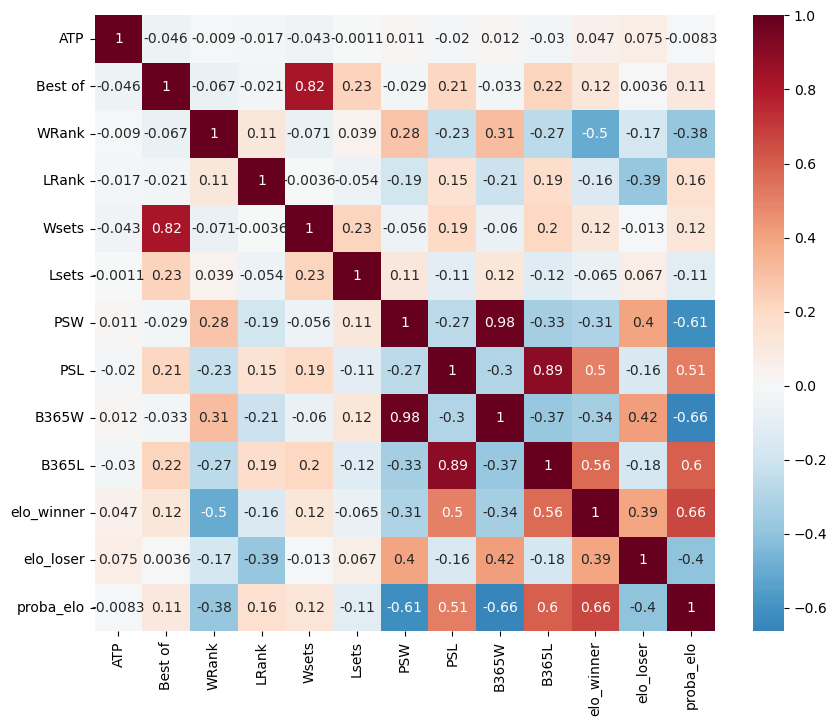

In [17]:
plt.figure(figsize=(10, 8))

sns.heatmap(df_atp_data.corr(), annot=True, cmap="RdBu_r", center=0)

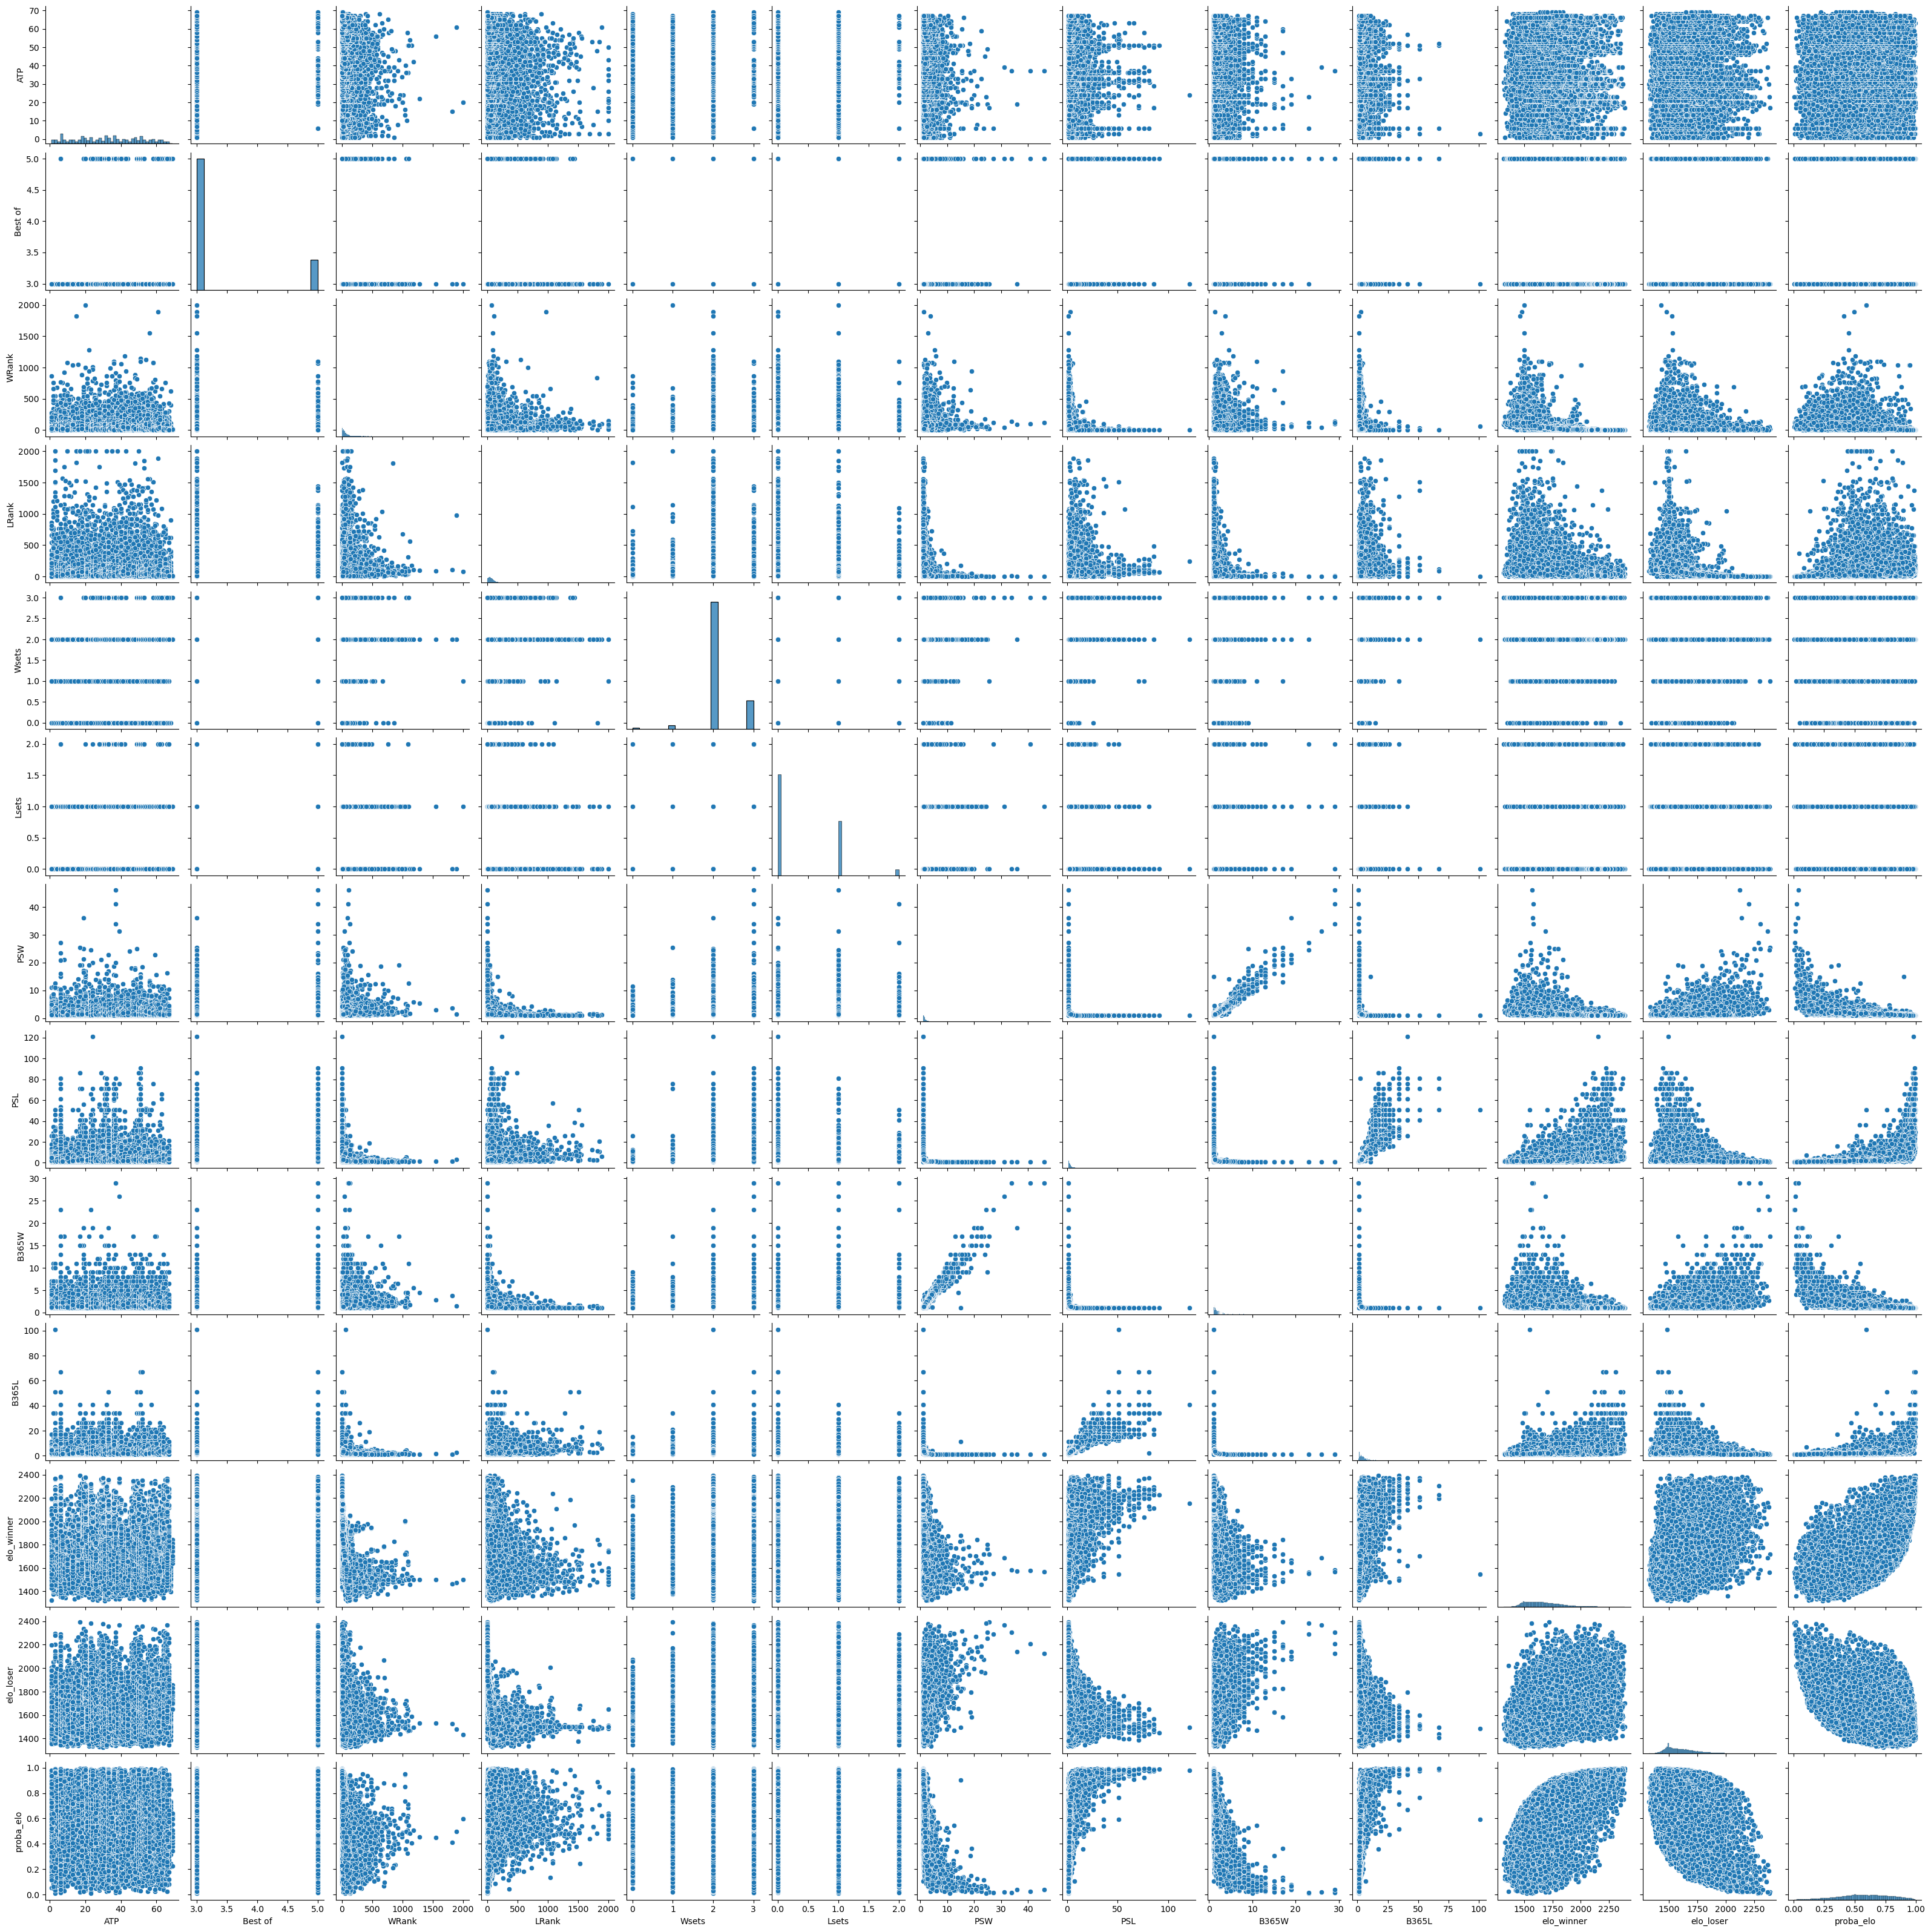

In [33]:
sns.pairplot(df_atp_data)

la premiere analyse rapide de la corralation montre qu il n ya pas une forte correlation entre les variable a part la correlation entre 
les cotes des bookmakers, cette anlyse nous oblige de chercher d autre données complementaire pour notre jeu de données pour que notre 
modele soit robuste.


on va esseyr de voir les top 10 joueurs winner et les top  10 joueurs loser

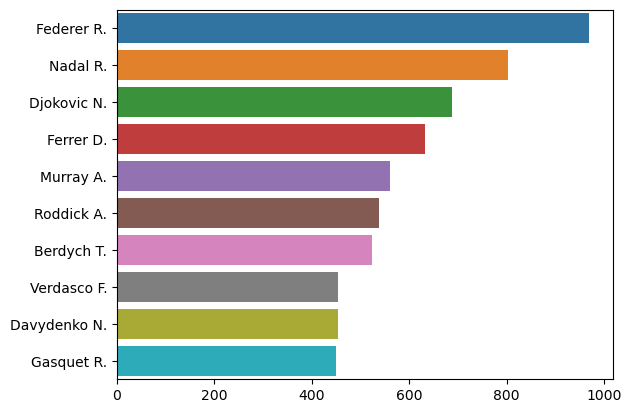

In [4]:
# top winner
top_winner=df_atp_data['Winner'].value_counts().head(10)
top_winner

sns.barplot(y=top_winner.index,x=top_winner.values);

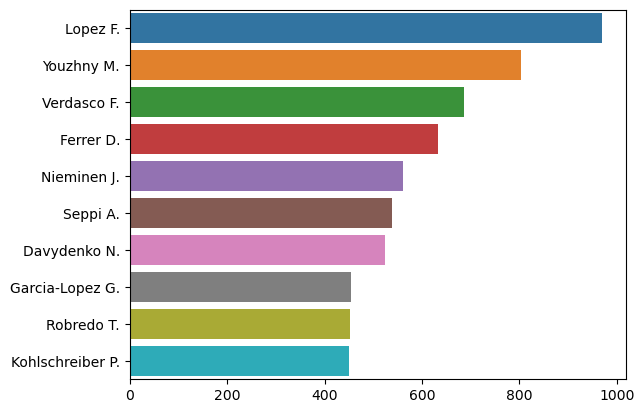

In [5]:
# top loser 
top_loser=df_atp_data['Loser'].value_counts().head(10)
#top_loser

sns.barplot(y=top_loser.index,x=top_winner.values);

on va aussi esseyer de regarder l impact de la surface sur le resultat des joueurs 
pour rappel il y a 4 type de surfaces dans notre jeu de données a savoir
clay, hard, carpet or grass


<AxesSubplot:xlabel='Court', ylabel='count'>

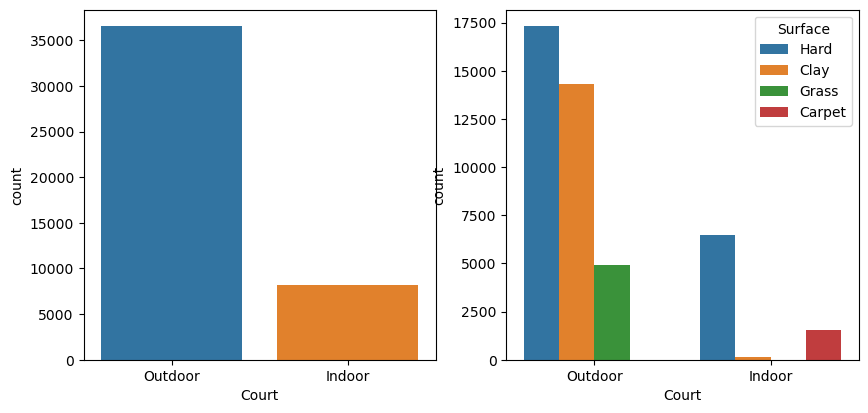

In [52]:
fig=plt.figure(figsize=(10,10))
plt.subplot(221)
sns.countplot(x='Court',data=df_atp_data)
plt.subplot(222)
sns.countplot(x='Court',hue='Surface', data=df_atp_data)

notre jeu de données ne contient pas des doublons


In [4]:
#  les cas de duplicats dans le DataFrame.
nb_lignes_dupliquees_data1 = df_atp_data.duplicated().sum()
nb_lignes_dupliquees_data1



0

In [4]:
# LE NOMBRE DE MATCH JOUE
print("Total number of matches : "+str(len(df_atp_data)))


Total number of matches : 44708


In [6]:
# LE NOMBRE DE JOUEUR DANS LE DATAFRAME
nbre_joueurs = pd.concat([ df_atp_data['Winner'],  df_atp_data['Loser']], axis=0).unique()
display(nbre_joueurs)

#nbre_joueurs = [''.join(i for i in word if i.isalnum()) for word in nbre_joueurs]
display(len(nbre_joueurs))


array(['Dosedel S.', 'Kiefer N.', 'Gaudio G.', ..., 'Auger-Aliassime F.',
       'Gaston H.', 'Seyboth Wild T.'], dtype=object)

1402

In [40]:
#nombre de match jouer par chaque joueur
match=pd.concat([ df_atp_data['Winner'],  df_atp_data['Loser'],df_atp_data['Surface']], axis=0).value_counts()
match

Hard              23799
Clay              14470
Grass              4916
Carpet             1523
Federer R.         1160
                  ...  
Wang Y.Jr.            1
Panfil G.             1
Patriarca D.          1
Sandbichler A.        1
Reichel A.            1
Length: 1406, dtype: int64

In [7]:
nbre_joueurs = pd.DataFrame(nbre_joueurs)

#renomer les colonnes
nbre_joueurs.rename({0:'Nom_joueur'}, axis=1)




#nbre_match_jouer = pd.DataFrame(match, index=match.index)
#nbre_match_jouer.rename({0:'nbre_match_jouer'}, axis=1, inplace=True)



,Nom_joueur
0,Dosedel S.
1,Kiefer N.
2,Gaudio G.
3,El Aynaoui Y.
4,Cherkasov A.
...,...
1397,Andreev A.
1398,Korda S.
1399,Auger-Aliassime F.
1400,Gaston H.


In [8]:
match=df_atp_data.groupby(['Surface']).Winner.value_counts()
match=pd.DataFrame(match, index=match.index)
match1=df_atp_data.groupby(['Surface']).Loser.value_counts()
match1=pd.DataFrame(match1, index=match1.index)
match1
match=pd.concat([match,match1],join='outer')
#match=match.join(match1)
match.fillna(0, inplace=True)
match.sort_values(by=['Surface'],ascending=False)


Winner  Loser
Surface Winner                        
Hard    Zimonjic N.         0.0    1.0
        de Voest R.         9.0    0.0
        Tsitsipas S.        8.0    0.0
        Tieleman L.         8.0    0.0
        Thomann N.          8.0    0.0
...                         ...    ...
Carpet  Gulbis E.           0.0    6.0
        Garcia-Lopez G.     0.0    6.0
        Ferreira W.         0.0    6.0
        Dlouhy L.           0.0    6.0
        Ljubicic I.        39.0    0.0

[4978 rows x 2 columns]

In [11]:
match=pd.concat([df_atp_data['Winner'],  df_atp_data['Loser']], axis=0).value_counts()
match_par_joueur = pd.DataFrame(match, index=match.index)
match_par_joueur.rename({0:'match_jouer'}, axis=1, inplace=True)
match_par_joueur
match_par_joueur['Nom'] = match_par_joueur.index
match_par_joueur.reset_index(inplace=True)
match_par_joueur.drop('index', axis=1, inplace=True)
match_par_joueur
first_column =match_par_joueur.pop('Nom')
match_par_joueur.insert(0, 'Nom', first_column)
match_par_joueur


#surface= df_atp_data['Surface']

#surface = pd.DataFrame(surface).rename({'Surface':'surface'}, axis=1)
#display(surface)



,Nom,match_jouer
0,Federer R.,1160
1,Nadal R.,978
2,Ferrer D.,957
3,Djokovic N.,833
4,Berdych T.,805
...,...,...
1397,Brizzi A.,1
1398,O'Neal J.,1
1399,Piccari F.,1
1400,Kim K,1


In [9]:
winners =df_atp_data['Winner'].value_counts()
winners = pd.DataFrame(winners).rename({'Winner':'winners'}, axis=1)
losers=df_atp_data['Loser'].value_counts()
losers = pd.DataFrame(losers).rename({'Loser':'losers'}, axis=1)
display(winners)
display(losers)


,winners
Federer R.,970
Nadal R.,803
Djokovic N.,687
Ferrer D.,632
Murray A.,560
...,...
Cruciat A.,1
De Heart R.,1
Jun W.S.,1
Qureshi A.U.H.,1


,losers
Lopez F.,369
Youzhny M.,345
Verdasco F.,339
Ferrer D.,325
Nieminen J.,308
...,...
Lejnieks K.,1
Ebelthite C.,1
Anderson A.,1
Hutchins R.,1


In [12]:
match_par_joueur.set_index('Nom', inplace=True)
df_1 = match_par_joueur.join(winners).join(losers)
df_1.fillna(0, inplace=True)
df_1.reset_index()


,Nom,match_jouer,winners,losers
0,Federer R.,1160,970.0,190.0
1,Nadal R.,978,803.0,175.0
2,Ferrer D.,957,632.0,325.0
3,Djokovic N.,833,687.0,146.0
4,Berdych T.,805,524.0,281.0
...,...,...,...,...
1397,Brizzi A.,1,0.0,1.0
1398,O'Neal J.,1,0.0,1.0
1399,Piccari F.,1,0.0,1.0
1400,Kim K,1,0.0,1.0


In [66]:

top_ratio=(df_1['winners'])/(df_1['match_jouer'])
top_ratio.head(10)

bad_ratio=(df_1['losers'])/(df_1['match_jouer'])
#bad_ratio.head(10)